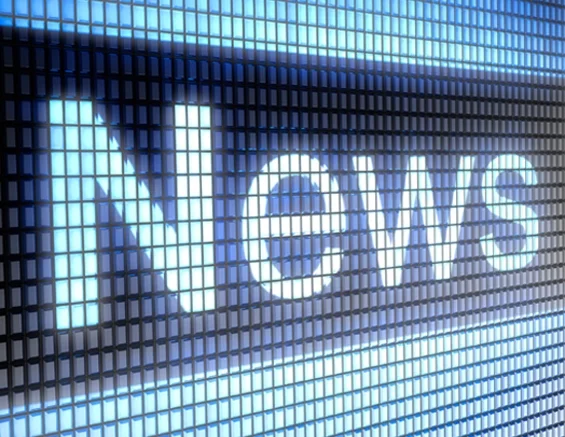

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Read the data
df=pd.read_csv('D:/news.csv')
#Get shape and head


In [3]:
df.shape


(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [8]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [9]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 43, 586]], dtype=int64)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Sample fake and real news articles for training the model
fake_news = ["Scientists Confirm Earth Will Be Destroyed In Less Than 10 Years",
             "Aliens Found Living Among Us, NASA Covering It Up Says Former Astronaut"]

real_news = ["Study Finds Majority Of Americans Now Prefer Online Shopping",
             "New COVID-19 Cases Hit Record Low In United States"]

# Combine the fake and real news into a single list
news_articles = fake_news + real_news

# Create labels for the news articles (0 for fake, 1 for real)
labels = [0] * len(fake_news) + [1] * len(real_news)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the vectorizer on the news articles
tfidf = vectorizer.fit_transform(news_articles)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, random_state=42)

# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

# Predict whether the input fake news is fake or real
input_article = ["Scientists Discover New Planet"]
input_tfidf = vectorizer.transform(input_article)
prediction = pac.predict(input_tfidf)

if prediction[0] == 0:
    print("The input news article is fake.")
else:
    print("The input news article is real.")


The input news article is fake.


In [11]:
##generalizing 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Load the news dataset from CSV file
news_df = pd.read_csv('D:/news.csv')

# Check the number of unique classes in the label column
classes = news_df['label'].unique()

if len(classes) == 2:
    # Create a TfidfVectorizer object
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

    # Fit and transform the vectorizer on the news articles
    tfidf = vectorizer.fit_transform(news_df['text'])

    # Create a PassiveAggressiveClassifier object
    pac = PassiveAggressiveClassifier(max_iter=50)
    pac.fit(tfidf, news_df['label'])

    # Get input news article from user
    input_article = input("Enter the news article you want to classify: ")

    # Transform the input article using the vectorizer
    input_tfidf = vectorizer.transform([input_article])

    # Predict the label and probabilities of the input article
    prediction = pac.predict(input_tfidf)
    probabilities = pac.decision_function(input_tfidf)

    # Print the classification result and probabilities
    if prediction[0] == 0:
        print("The input news article is fake with {:.2f}% confidence.".format(
            max(-probabilities[0], probabilities[0]) * 100))
    else:
        print("The input news article is real with {:.2f}% confidence.".format(
            max(-probabilities[0], probabilities[0]) * 100))
else:
    print("The dataset contains only one class. Cannot fit the model.")


Enter the news article you want to classify: EV is the future
The input news article is real with 68.56% confidence.
